In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np


Epoch 1/5


/opt/anaconda3/envs/UP2024/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9012 - loss: 0.3176 - val_accuracy: 0.9751 - val_loss: 0.0776
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9840 - loss: 0.0497 - val_accuracy: 0.9866 - val_loss: 0.0390
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9889 - loss: 0.0346 - val_accuracy: 0.9895 - val_loss: 0.0319
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9925 - loss: 0.0232 - val_accuracy: 0.9909 - val_loss: 0.0276
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9948 - loss: 0.0159 - val_accuracy: 0.9891 - val_loss: 0.0317


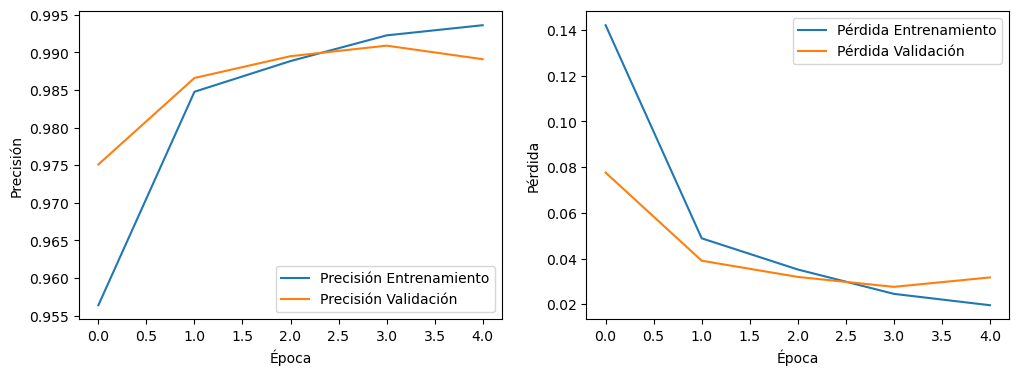

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       102,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 365,792 (1.40 MB)

 Trainable params: 121,930 (476.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 243,862 (952.59 KB)

In [2]:
# Cargar y preparar los datos
def cargar_datos():
    # Cargar dataset MNIST
    (X_train, y_train), (X_test, y_test) = datasets.mnist.load_data()
    
    # Normalizar los valores de píxeles a rango [0,1]
    X_train = X_train.astype('float32') / 255
    X_test = X_test.astype('float32') / 255
    
    # Añadir dimensión del canal
    X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
    X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)
    
    return (X_train, y_train), (X_test, y_test)

# Crear el modelo
def crear_modelo():
    modelo = models.Sequential([
        # Primera capa convolucional
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        layers.MaxPooling2D((2, 2)),
        
        # Segunda capa convolucional
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        
        # Aplanar los datos para la capa densa
        layers.Flatten(),
        
        # Capas densas
        layers.Dense(64, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])
    
    return modelo

# Entrenar el modelo
def entrenar_modelo():
    # Cargar datos
    (X_train, y_train), (X_test, y_test) = cargar_datos()
    
    # Crear modelo
    modelo = crear_modelo()
    
    # Compilar modelo
    modelo.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    
    # Entrenar modelo
    historial = modelo.fit(X_train, y_train, epochs=5, 
                         validation_data=(X_test, y_test))
    
    return modelo, historial

# Evaluar y visualizar resultados
def evaluar_modelo(modelo, historial):
    # Graficar precisión del entrenamiento
    plt.figure(figsize=(12, 4))
    
    plt.subplot(1, 2, 1)
    plt.plot(historial.history['accuracy'], label='Precisión Entrenamiento')
    plt.plot(historial.history['val_accuracy'], label='Precisión Validación')
    plt.xlabel('Época')
    plt.ylabel('Precisión')
    plt.legend()
    
    plt.subplot(1, 2, 2)
    plt.plot(historial.history['loss'], label='Pérdida Entrenamiento')
    plt.plot(historial.history['val_loss'], label='Pérdida Validación')
    plt.xlabel('Época')
    plt.ylabel('Pérdida')
    plt.legend()
    
    plt.show()

if __name__ == "__main__":
    # Entrenar modelo
    modelo, historial = entrenar_modelo()
    
    # Evaluar y visualizar resultados
    evaluar_modelo(modelo, historial)
    
    # Imprimir resumen del modelo
    modelo.summary()

## Conv2D (Capa Convolucional):


### Actúa como detector de características (features)
### Aplica filtros que aprenden a detectar patrones como:

- Bordes
- Texturas
- Formas simples


Ejemplo visual:

```markdown
Imagen original:     Filtro:          Resultado:
1 1 1 0 0           1  0  -1
1 1 1 0 0     ⊗     1  0  -1    =    Detecta bordes verticales
1 1 1 0 0           1  0  -1
```

## MaxPooling2D:


### Reduce la dimensionalidad de los datos
### Mantiene las características más importantes

### Ayuda a:

- Reducir el costo computacional
- Prevenir el sobreajuste
- Hacer el modelo más robusto



Ejemplo visual de MaxPooling:
```markdown
Entrada (4x4):      MaxPooling 2x2:     Resultado (2x2):
1  2  3  4                              4  6
5  4  6  8          max(2x2)     →      9  8
9  5  7  3
2  7  8  1
```

## Juntas forman un bloque común porque:

- Conv2D detecta características
- MaxPooling2D reduce y condensa esa información



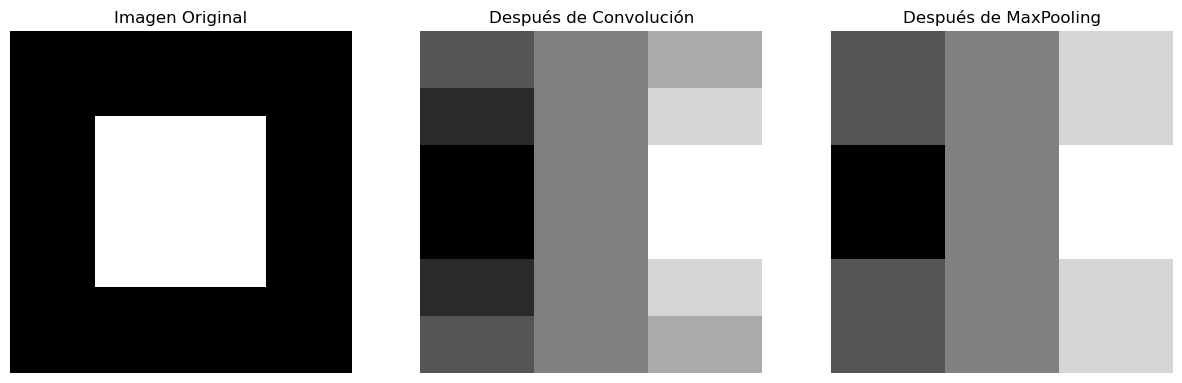

Dimensiones de la imagen original: (1, 8, 8, 1)
Dimensiones después de la convolución: (1, 6, 6, 1)
Dimensiones después del max pooling: (1, 3, 3, 1)


In [4]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

def visualizar_conv_maxpool():
    # Crear una imagen simple 8x8
    imagen = np.zeros((1, 8, 8, 1))
    imagen[0, 2:6, 2:6, 0] = 1  # Crear un cuadrado blanco

    # Definir un filtro para detectar bordes
    filtro = tf.constant([
        [1, 0, -1],
        [1, 0, -1],
        [1, 0, -1]
    ], dtype=tf.float32)
    filtro = tf.reshape(filtro, (3, 3, 1, 1))

    # Aplicar la convolución manualmente usando tf.nn.conv2d
    conv_result = tf.nn.conv2d(
        imagen, 
        filtro, 
        strides=[1, 1, 1, 1], 
        padding='VALID'
    )

    # Aplicar max pooling
    maxpool_result = tf.nn.max_pool2d(
        conv_result,
        ksize=[1, 2, 2, 1],
        strides=[1, 2, 2, 1],
        padding='VALID'
    )

    # Visualizar resultados
    plt.figure(figsize=(15, 5))
    
    plt.subplot(131)
    plt.title('Imagen Original')
    plt.imshow(imagen[0, :, :, 0], cmap='gray')
    plt.axis('off')
    
    plt.subplot(132)
    plt.title('Después de Convolución')
    plt.imshow(conv_result[0, :, :, 0], cmap='gray')
    plt.axis('off')
    
    plt.subplot(133)
    plt.title('Después de MaxPooling')
    plt.imshow(maxpool_result[0, :, :, 0], cmap='gray')
    plt.axis('off')
    
    plt.show()

    return imagen, conv_result, maxpool_result

# Ejecutar visualización
imagen, salida_conv, salida_maxpool = visualizar_conv_maxpool()

# Imprimir las dimensiones para entender mejor la transformación
print("Dimensiones de la imagen original:", imagen.shape)
print("Dimensiones después de la convolución:", salida_conv.shape)
print("Dimensiones después del max pooling:", salida_maxpool.shape)

- La Conv2D detecta los bordes del cuadrado
- El MaxPooling2D reduce el tamaño manteniendo las activaciones más fuertes

### Beneficios de usar ambas capas:

- Eficiencia: Reduces dimensiones mientras mantienes información importante
- Jerarquía: Capas más profundas pueden detectar características más complejas
- Invarianza: El modelo se vuelve más robusto a pequeñas traslaciones o distorsiones

##  El "stride" (paso) y el "padding" (relleno). 

Te explico por qué son fundamentales y cómo funcionan:

## Stride (Paso):


- Define cuántos píxeles se mueve el filtro en cada paso
- Afecta el tamaño de la salida
- Ayuda a reducir dimensionalidad


## Padding (Relleno):


- Añade píxeles alrededor de la imagen
- Tipos principales:

- 'valid': sin padding
- 'same': mantiene dimensiones originales


Ayuda a preservar información de los bordes

### Veamos una visualización para entender mejor estos conceptos:

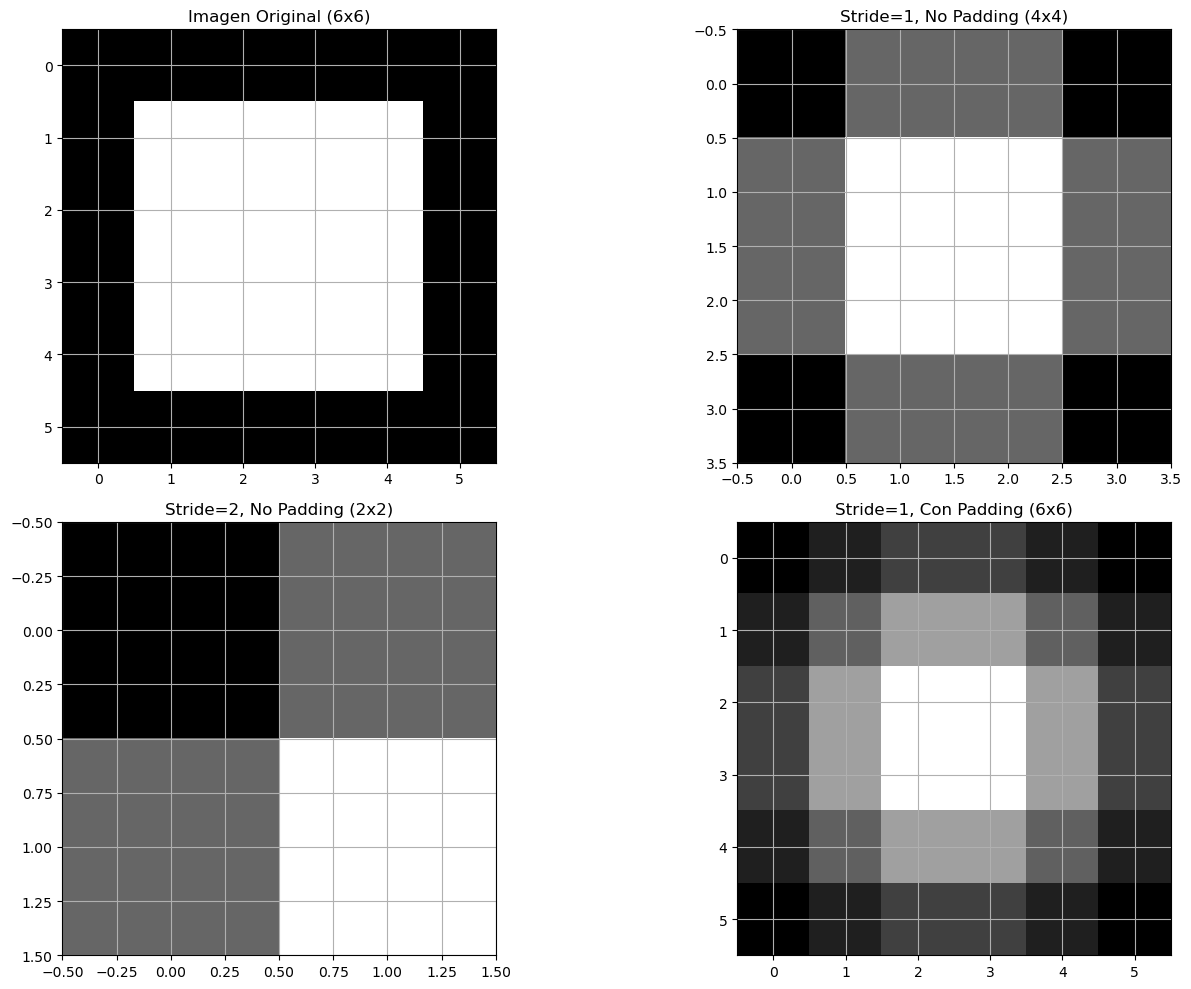

Dimensiones originales: (6, 6)
Stride=1, No Padding: (1, 4, 4, 1)
Stride=2, No Padding: (1, 2, 2, 1)
Stride=1, Con Padding: (1, 6, 6, 1)


In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

def visualizar_stride_padding():
    # Crear imagen de ejemplo (6x6)
    imagen = np.zeros((6, 6))
    imagen[1:5, 1:5] = 1  # Cuadrado blanco central
    
    # Filtro simple de 3x3
    filtro = np.array([
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]
    ]) / 9.0  # Normalizado para promedio
    
    # Preparar datos para TensorFlow
    imagen_tf = tf.constant(imagen[np.newaxis, :, :, np.newaxis], dtype=tf.float32)
    filtro_tf = tf.constant(filtro[:, :, np.newaxis, np.newaxis], dtype=tf.float32)
    
    # Aplicar diferentes configuraciones
    # 1. Stride=1, No Padding
    conv_stride1_valid = tf.nn.conv2d(
        imagen_tf, filtro_tf, 
        strides=[1, 1, 1, 1], 
        padding='VALID'
    )
    
    # 2. Stride=2, No Padding
    conv_stride2_valid = tf.nn.conv2d(
        imagen_tf, filtro_tf, 
        strides=[1, 2, 2, 1], 
        padding='VALID'
    )
    
    # 3. Stride=1, Con Padding
    conv_stride1_same = tf.nn.conv2d(
        imagen_tf, filtro_tf, 
        strides=[1, 1, 1, 1], 
        padding='SAME'
    )
    
    # Visualizar resultados
    plt.figure(figsize=(15, 10))
    
    plt.subplot(221)
    plt.title('Imagen Original (6x6)')
    plt.imshow(imagen, cmap='gray')
    plt.grid(True)
    
    plt.subplot(222)
    plt.title('Stride=1, No Padding (4x4)')
    plt.imshow(conv_stride1_valid[0, :, :, 0], cmap='gray')
    plt.grid(True)
    
    plt.subplot(223)
    plt.title('Stride=2, No Padding (2x2)')
    plt.imshow(conv_stride2_valid[0, :, :, 0], cmap='gray')
    plt.grid(True)
    
    plt.subplot(224)
    plt.title('Stride=1, Con Padding (6x6)')
    plt.imshow(conv_stride1_same[0, :, :, 0], cmap='gray')
    plt.grid(True)
    
    plt.tight_layout()
    plt.show()
    
    # Imprimir dimensiones
    print("Dimensiones originales:", imagen.shape)
    print("Stride=1, No Padding:", conv_stride1_valid.shape)
    print("Stride=2, No Padding:", conv_stride2_valid.shape)
    print("Stride=1, Con Padding:", conv_stride1_same.shape)

# Ejecutar visualización
visualizar_stride_padding()

## Stride:


- Stride=1: El filtro se mueve pixel por pixel
- Stride=2: El filtro salta de 2 en 2 pixels

### La fórmula para calcular el tamaño de salida es:
```markdown
output_size = (input_size - filter_size + 2*padding) / stride + 1
```

## Padding:


### 'VALID': No añade padding

- La imagen se reduce
- Se pierde información de los bordes


### 'SAME': Añade padding para mantener dimensiones

- Preserva el tamaño original
-Útil para redes profundas

## Impacto en la red:

- Stride mayor → reduce dimensiones más rápido
- Padding 'SAME' → mantiene más información

## La combinación afecta:

- Tiempo de entrenamiento
- Uso de memoria
- Calidad de las características extraídas

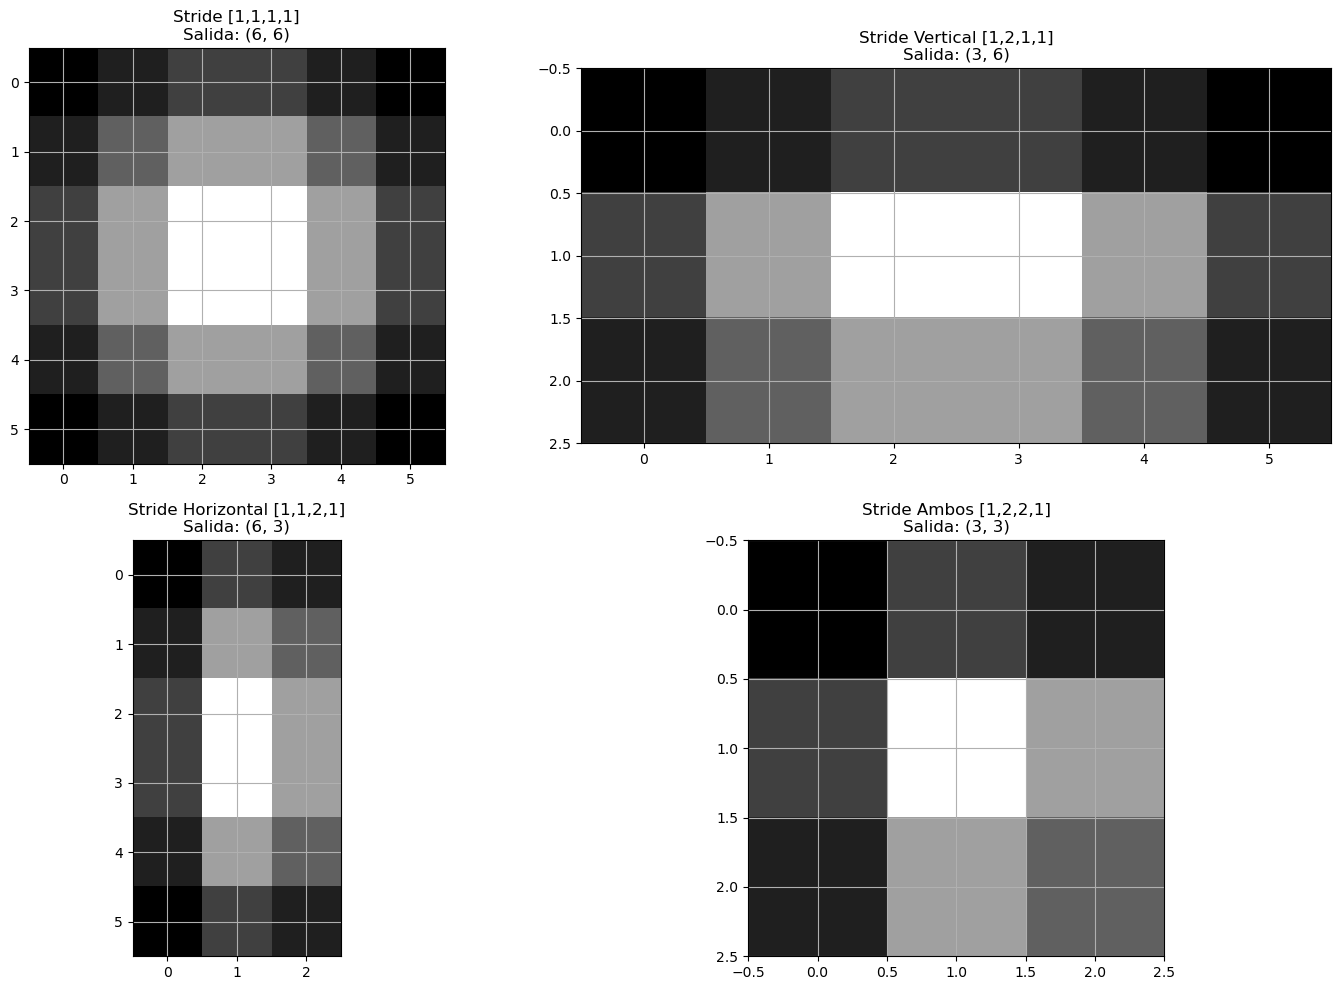


Formas de salida:
Entrada original: (8, 8)
Stride [1,1,1,1]: (1, 6, 6, 1)
Stride vertical [1,2,1,1]: (1, 3, 6, 1)
Stride horizontal [1,1,2,1]: (1, 6, 3, 1)
Stride ambos [1,2,2,1]: (1, 3, 3, 1)


In [2]:
def visualizar_diferentes_strides():
    # Crear imagen de ejemplo (8x8)
    imagen = np.zeros((8, 8))
    imagen[2:6, 2:6] = 1  # Cuadrado blanco central
    
    # Convertir a formato tensorflow (batch, height, width, channels)
    imagen_tf = tf.constant(imagen[np.newaxis, :, :, np.newaxis], dtype=tf.float32)
    
    # Filtro simple 3x3
    filtro = np.ones((3, 3, 1, 1)) / 9.0  # Filtro promedio normalizado
    filtro_tf = tf.constant(filtro, dtype=tf.float32)
    
    # Diferentes configuraciones de stride
    # 1. Stride normal [1,1,1,1]
    conv_stride_1 = tf.nn.conv2d(
        imagen_tf, filtro_tf,
        strides=[1, 1, 1, 1],
        padding='VALID'
    )
    
    # 2. Stride vertical [1,2,1,1]
    conv_stride_vertical = tf.nn.conv2d(
        imagen_tf, filtro_tf,
        strides=[1, 2, 1, 1],
        padding='VALID'
    )
    
    # 3. Stride horizontal [1,1,2,1]
    conv_stride_horizontal = tf.nn.conv2d(
        imagen_tf, filtro_tf,
        strides=[1, 1, 2, 1],
        padding='VALID'
    )
    
    # 4. Stride en ambas direcciones [1,2,2,1]
    conv_stride_both = tf.nn.conv2d(
        imagen_tf, filtro_tf,
        strides=[1, 2, 2, 1],
        padding='VALID'
    )
    
    # Visualizar resultados
    plt.figure(figsize=(15, 10))
    
    plt.subplot(221)
    plt.title('Stride [1,1,1,1]\nSalida: ' + str(conv_stride_1.shape[1:3]))
    plt.imshow(conv_stride_1[0, :, :, 0], cmap='gray')
    plt.grid(True)
    
    plt.subplot(222)
    plt.title('Stride Vertical [1,2,1,1]\nSalida: ' + str(conv_stride_vertical.shape[1:3]))
    plt.imshow(conv_stride_vertical[0, :, :, 0], cmap='gray')
    plt.grid(True)
    
    plt.subplot(223)
    plt.title('Stride Horizontal [1,1,2,1]\nSalida: ' + str(conv_stride_horizontal.shape[1:3]))
    plt.imshow(conv_stride_horizontal[0, :, :, 0], cmap='gray')
    plt.grid(True)
    
    plt.subplot(224)
    plt.title('Stride Ambos [1,2,2,1]\nSalida: ' + str(conv_stride_both.shape[1:3]))
    plt.imshow(conv_stride_both[0, :, :, 0], cmap='gray')
    plt.grid(True)
    
    plt.tight_layout()
    plt.show()
    
    # Imprimir las formas de salida
    print("\nFormas de salida:")
    print(f"Entrada original: {imagen.shape}")
    print(f"Stride [1,1,1,1]: {conv_stride_1.shape}")
    print(f"Stride vertical [1,2,1,1]: {conv_stride_vertical.shape}")
    print(f"Stride horizontal [1,1,2,1]: {conv_stride_horizontal.shape}")
    print(f"Stride ambos [1,2,2,1]: {conv_stride_both.shape}")

visualizar_diferentes_strides()

In [4]:
#!pip install --upgrade gradio


  Using cached pydantic-2.9.2-py3-none-any.whl.metadata (149 kB)
  Using cached typer-0.12.5-py3-none-any.whl.metadata (15 kB)
  Using cached uvicorn-0.32.0-py3-none-any.whl.metadata (6.6 kB)
  Using cached annotated_types-0.7.0-py3-none-any.whl.metadata (15 kB)
  Using cached pydantic_core-2.23.4-cp312-cp312-macosx_11_0_arm64.whl.metadata (6.6 kB)
  Using cached shellingham-1.5.4-py2.py3-none-any.whl.metadata (3.5 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.7/56.7 MB 34.1 MB/s eta 0:00:00a 0:00:01
Using cached pydantic-2.9.2-py3-none-any.whl (434 kB)
Using cached pydantic_core-2.23.4-cp312-cp312-macosx_11_0_arm64.whl (1.8 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.8/9.8 MB 40.2 MB/s eta 0:00:00a 0:00:01
Using cached typer-0.12.5-py3-none-any.whl (47 kB)
Using cached uvicorn-0.32.0-py3-none-any.whl (63 kB)
Using cached annotated_types-0.7.0-py3-none-any.whl (13 kB)
Using cached shellingham-1.5.4-py2.py3-none-any.whl (9.8 kB)


ModuleNotFoundError: No module named 'gradio'